In [1]:
# Set the working directory to the desired path

import os
import matplotlib.pyplot as plt

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Evidence Based Analysis/House Prices'

os.chdir(path)

In [2]:
#Import data

import pandas as pd

sales = pd.read_csv('Property_Sales_Transactions.csv')
assess = pd.read_csv('allegheny_county_master_file.csv')

C:\Users\MaxBo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\MaxBo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\MaxBo\AppData\Local\Temp/ipykernel_33216/4093254395.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('Property_Sales_Transactions.csv')
C:\Users\MaxBo\AppData\Local\Temp/ipykernel_33216/4093254395.py:6: DtypeWarning: Columns (19,20,29,30,31,37,38,46,57,83) have mixed types. Specify dtype option on import or set low_memory=False.
  assess = pd.read_csv('allegheny_county_master_file.csv')


In [3]:
#Get first impression of data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

sales.head()

,_id,PARID,FULL_ADDRESS,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,PROPERTYZIP,SCHOOLCODE,SCHOOLDESC,MUNICODE,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
0,40193110,1010G00075000000,"0 HILL ST, SOUTH PARK, PA 15129",0.0,,NaN,HILL,ST,NaN,NaN,SOUTH PARK,PA,15129.0,37,South Park,945,South Park,2022-07-06,2022-06-21,1.0,18965,534.0,H,MULTI-PARCEL SALE,DE,DEED
1,40193111,1075F00108000000,"4720 HIGHPOINT DR, GIBSONIA, PA 15044",4720.0,,NaN,HIGHPOINT,DR,NaN,NaN,GIBSONIA,PA,15044.0,20,Hampton Township,914,Hampton,2012-09-27,2012-09-27,120000.0,15020,356.0,3,LOVE AND AFFECTION SALE,DE,DEED
2,40193112,0011A00237000000,"0 LOMBARD ST, PITTSBURGH, PA 15219",0.0,,NaN,LOMBARD,ST,NaN,NaN,PITTSBURGH,PA,15219.0,47,Pittsburgh,103,3rd Ward - PITTSBURGH,2015-01-06,2015-01-06,1783.0,TR15,2.0,2,CITY TREASURER SALE,TS,TREASURER DEED
3,40193113,0011J00047000000,"1903 FORBES AVE, PITTSBURGH, PA 15219",1903.0,,NaN,FORBES,AVE,NaN,NaN,PITTSBURGH,PA,15219.0,47,Pittsburgh,101,1st Ward - PITTSBURGH,2012-10-26,2012-10-26,4643.0,TR13,3.0,2,CITY TREASURER SALE,TS,TREASURER DEED
4,40193114,0011J00191000000,"1806 TUSTIN ST, PITTSBURGH, PA 15219",1806.0,,NaN,TUSTIN,ST,NaN,NaN,PITTSBURGH,PA,15219.0,47,Pittsburgh,101,1st Ward - PITTSBURGH,2023-04-28,2023-04-28,44100.0,TR24,2.0,GV,GOVERNMENT SALE,TS,TREASURER DEED


In [4]:
#Seeing the different types of sales

pd.set_option('display.max_rows', 27)
sales['SALEDESC'].value_counts()

SALEDESC
LOVE AND AFFECTION SALE                    92253
VALID SALE                                 84659
MULTI-PARCEL SALE                          60083
QUIT CLAIM                                 39937
TIME ON MARKET (INSUFF/EXCESS)             39752
OTHER INVALID SALES INDICATED              28758
OTHER                                      21253
SALE NOT ANALYZED                          15922
CORRECTIVE DEED / DUPLICATE SALE           15031
SHERIFF SALE                               14133
GOVERNMENT SALE                             8014
CORPORATION TRANSFER                        7745
BUILDING NOT YET ASSESSED                   5840
DATE OF TRANSFER (RECORD YR <> SALE YR)     5232
NO ASSESSED VALUATION                       3863
CITY TREASURER SALE                         2671
ESTATE SALE                                 2620
NOT APPLICABLE                              2259
SALE OF PREVIOUS FORECLOSURE - INVALID      1544
BANK/FINANCIAL INSTITUTION                  1420
EXEMPT BUYE

In [5]:
#Seeing different types of municipalities

pd.set_option('display.max_rows', None)

#MUNIDESC represents our individual neighborhoods for analysis

sales['MUNIDESC'].value_counts()

MUNIDESC
Penn Hills                 16754
19th Ward - PITTSBURGH     12082
Ross                       11379
Mt.Lebanon                  9890
Bethel Park                 9612
Shaler                      9473
Moon                        9416
14th Ward - PITTSBURGH      8792
Monroeville                 8743
McCandless                  8594
Plum                        8463
South Fayette               8087
West Mifflin                7279
Upper St. Clair             6411
Pine                        6401
10th Ward - PITTSBURGH      6249
North Fayette               6191
Baldwin Boro                6124
20th Ward - PITTSBURGH      5976
Hampton                     5975
Scott                       5707
Wilkinsburg                 5594
Robinson                    5477
15th Ward - PITTSBURGH      5243
Franklin Park               5138
South Park                  4924
West Deer                   4808
27th Ward - PITTSBURGH      4773
Elizabeth Twp               4757
Whitehall                   4521
J

In [6]:
#Reset row display
pd.set_option('display.max_rows', 8)

In [7]:
#We will only use valid sales. Filter by valid sale.

sales = sales[sales['SALEDESC'] == 'VALID SALE']

In [8]:
#We will only focus on Pittsburgh

# sales = sales[sales['PROPERTYCITY'] == 'PITTSBURGH']   #This code will not work, entry is innaccurate

#Only municipalities labelled as wards in Pittsburgh can stay

sales = sales[sales['MUNIDESC'].str.contains("PITTSBURGH", case=True, na=False)]

In [9]:
#Check for only pittsburgh
pd.set_option('display.max_rows', None)
sales['MUNIDESC'].value_counts()

MUNIDESC
19th Ward - PITTSBURGH    1987
14th Ward - PITTSBURGH    1796
7th Ward - PITTSBURGH      897
10th Ward - PITTSBURGH     756
20th Ward - PITTSBURGH     709
15th Ward - PITTSBURGH     652
27th Ward - PITTSBURGH     629
29th Ward - PITTSBURGH     595
17th Ward - PITTSBURGH     580
28th Ward - PITTSBURGH     573
4th Ward - PITTSBURGH      513
11th Ward - PITTSBURGH     498
26th Ward - PITTSBURGH     467
32nd Ward - PITTSBURGH     442
16th Ward - PITTSBURGH     440
9th Ward - PITTSBURGH      408
8th Ward - PITTSBURGH      321
31st Ward - PITTSBURGH     284
2nd Ward - PITTSBURGH      273
6th Ward - PITTSBURGH      267
18th Ward - PITTSBURGH     257
24th Ward - PITTSBURGH     204
25th Ward - PITTSBURGH     165
30th Ward - PITTSBURGH     143
3rd Ward - PITTSBURGH      121
12th Ward - PITTSBURGH     111
22nd Ward - PITTSBURGH     109
23rd Ward - PITTSBURGH     103
13th Ward - PITTSBURGH     101
5th Ward - PITTSBURGH       99
1st Ward  - PITTSBURGH      92
21st Ward - PITTSBURGH      85

In [10]:
#Summary stats of price for valid sales

sales['PRICE'].describe()

count    1.467700e+04
mean     2.676847e+05
std      1.200644e+06
min      1.000000e+00
25%      1.100000e+05
50%      1.850000e+05
75%      3.150000e+05
max      1.244000e+08
Name: PRICE, dtype: float64

In [11]:
#How many observations do we have

len(sales)

14677

In [12]:
#How much of our data is missing

sales_na = sales['PRICE'].isna().sum()
n_sales_total = len(sales)

percent_sales_missing = (sales_na/n_sales_total)*100

print(f"We are missing {percent_sales_missing}% of the sales data.")

We are missing 0.0% of the sales data.


In [13]:
#Count missing values per neighborhood
pd.set_option('display.max_rows', None)

missing_in_neigh = sales.groupby('MUNIDESC')['PRICE'].apply(lambda x: x.isna().sum() / len(x)*100)

missing_in_neigh.sort_values(ascending=False)

#No specific neighborhoods have any valid sales data missing

MUNIDESC
10th Ward - PITTSBURGH    0.0
11th Ward - PITTSBURGH    0.0
8th Ward - PITTSBURGH     0.0
7th Ward - PITTSBURGH     0.0
6th Ward - PITTSBURGH     0.0
5th Ward - PITTSBURGH     0.0
4th Ward - PITTSBURGH     0.0
3rd Ward - PITTSBURGH     0.0
32nd Ward - PITTSBURGH    0.0
31st Ward - PITTSBURGH    0.0
30th Ward - PITTSBURGH    0.0
2nd Ward - PITTSBURGH     0.0
29th Ward - PITTSBURGH    0.0
28th Ward - PITTSBURGH    0.0
27th Ward - PITTSBURGH    0.0
26th Ward - PITTSBURGH    0.0
25th Ward - PITTSBURGH    0.0
24th Ward - PITTSBURGH    0.0
23rd Ward - PITTSBURGH    0.0
22nd Ward - PITTSBURGH    0.0
21st Ward - PITTSBURGH    0.0
20th Ward - PITTSBURGH    0.0
1st Ward  - PITTSBURGH    0.0
19th Ward - PITTSBURGH    0.0
18th Ward - PITTSBURGH    0.0
17th Ward - PITTSBURGH    0.0
16th Ward - PITTSBURGH    0.0
15th Ward - PITTSBURGH    0.0
14th Ward - PITTSBURGH    0.0
13th Ward - PITTSBURGH    0.0
12th Ward - PITTSBURGH    0.0
9th Ward - PITTSBURGH     0.0
Name: PRICE, dtype: float64

In [14]:
#How many zeroes do we have in our dataset

zero_count = (sales['PRICE'] == 0).sum()
zero_count

0

In [15]:
#How much of our data is below 20,000 dollars

less_than_5000 = (sales['PRICE'] <= 20000).sum()
less_than_5000/len(sales)

0.01110581181440349

In [16]:
#See which areas have these small price values

less_than_value = sales[sales['PRICE']<=10000]
less_than_value['MUNIDESC'].value_counts().sort_values(ascending=False)

MUNIDESC
19th Ward - PITTSBURGH    7
15th Ward - PITTSBURGH    6
26th Ward - PITTSBURGH    6
25th Ward - PITTSBURGH    5
18th Ward - PITTSBURGH    5
12th Ward - PITTSBURGH    4
10th Ward - PITTSBURGH    4
13th Ward - PITTSBURGH    4
27th Ward - PITTSBURGH    4
14th Ward - PITTSBURGH    3
24th Ward - PITTSBURGH    3
20th Ward - PITTSBURGH    2
4th Ward - PITTSBURGH     2
28th Ward - PITTSBURGH    2
21st Ward - PITTSBURGH    2
16th Ward - PITTSBURGH    1
23rd Ward - PITTSBURGH    1
6th Ward - PITTSBURGH     1
7th Ward - PITTSBURGH     1
3rd Ward - PITTSBURGH     1
5th Ward - PITTSBURGH     1
31st Ward - PITTSBURGH    1
Name: count, dtype: int64

In [17]:
#We will filter out all house sales less than 10,000. This safely eliminates any possibility of potential data entry errors.

sales = sales[sales['PRICE']>10000]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MaxBo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
#New summary stats after filter

price = sales['PRICE']
price.describe()

count    1.461100e+04
mean     2.688734e+05
std      1.203222e+06
min      1.053000e+04
25%      1.120000e+05
50%      1.850000e+05
75%      3.150000e+05
max      1.244000e+08
Name: PRICE, dtype: float64

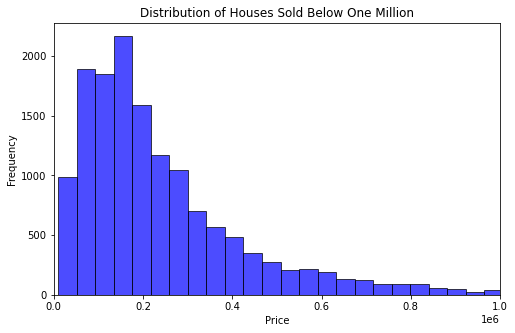

In [20]:
#Histogram of price under million dollars

plt.figure(figsize=(8, 5))
plt.hist(price, bins=3000, color='blue', edgecolor='black', alpha=0.7)

plt.xlim(0,1000000)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Houses Sold Below One Million')

plt.show()

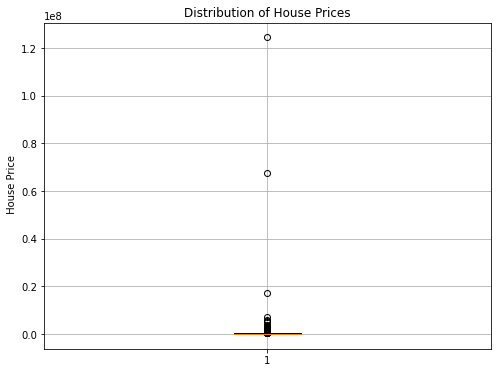

In [21]:
#Make a boxplot to see distribution of all our data

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(price, vert=True, patch_artist=True)



# Customize plot
plt.title("Distribution of House Prices")
plt.ylabel(" House Price")
plt.grid(True)

# Show the plot
plt.show()

In [22]:
#We can see there are outliers. Confirm this.
import numpy as np


Q1 = np.percentile(sales['PRICE'],25)
Q3 = np.percentile(sales['PRICE'],75)

IQR = Q3 - Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

outliers = sales[(sales['PRICE']>upper) | (sales['PRICE']<lower)]

In [23]:
#Mean before dealing with high leverage observations
mean_before = sales['PRICE'].mean()

In [24]:
#Distribution of outliers in each neighborhood

outliers['MUNIDESC'].value_counts()

MUNIDESC
14th Ward - PITTSBURGH    409
7th Ward - PITTSBURGH     204
11th Ward - PITTSBURGH     70
2nd Ward - PITTSBURGH      50
19th Ward - PITTSBURGH     50
9th Ward - PITTSBURGH      37
4th Ward - PITTSBURGH      31
6th Ward - PITTSBURGH      23
10th Ward - PITTSBURGH     21
24th Ward - PITTSBURGH     15
22nd Ward - PITTSBURGH     13
8th Ward - PITTSBURGH      12
17th Ward - PITTSBURGH     11
1st Ward  - PITTSBURGH     10
18th Ward - PITTSBURGH     10
25th Ward - PITTSBURGH      6
23rd Ward - PITTSBURGH      3
16th Ward - PITTSBURGH      2
28th Ward - PITTSBURGH      1
21st Ward - PITTSBURGH      1
15th Ward - PITTSBURGH      1
26th Ward - PITTSBURGH      1
12th Ward - PITTSBURGH      1
5th Ward - PITTSBURGH       1
Name: count, dtype: int64

In [25]:
#How much of our data is above 60,000,000 dollars

above_value = (sales['PRICE'] >= 60000000).sum()
above_value



2

In [26]:
#There are two observations above 60,000,000. We should keep in mind what neighborhood they are.

over_60mil = sales[sales['PRICE'] >= 60000000]
over_60mil

,_id,PARID,FULL_ADDRESS,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,PROPERTYSTATE,PROPERTYZIP,SCHOOLCODE,SCHOOLDESC,MUNICODE,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
53157,40246267,0009P00050000000,"1001 LIBERTY AVE, PITTSBURGH, PA 15222",1001.0,,NaN,LIBERTY,AVE,NaN,NaN,PITTSBURGH,PA,15222.0,47,Pittsburgh,102,2nd Ward - PITTSBURGH,2013-08-09,2013-08-09,124400000.0,15334,322,0,VALID SALE,SW,SPECIAL WARRANTY
158220,40351330,0002E00038000000,"525 WILLIAM PENN PL, PITTSBURGH, PA 15219",525.0,,NaN,WILLIAM PENN,PL,NaN,NaN,PITTSBURGH,PA,15219.0,47,Pittsburgh,102,2nd Ward - PITTSBURGH,2016-09-21,2016-08-10,67650000.0,16544,152.0,0,VALID SALE,SW,SPECIAL WARRANTY


In [27]:
#Mean change when the two houses over 60 million are removed

sales = sales[sales['PRICE'] < 60000000]
mean_after = sales['PRICE'].mean()

mean_before-mean_after 

13109.196602072305

In [28]:
sales = sales[sales['PRICE'] < 60000000]

In [29]:
#Now we want to start thinking about rising house prices
#Create new column with year of sale

sales['YEAR'] = sales['SALEDATE'].str[:4]
sales['YEAR'].astype(int).head(5)

51     2013
82     2021
602    2012
854    2012
909    2012
Name: YEAR, dtype: int32

In [30]:
#How many sales in each year

sales['YEAR'].value_counts()

YEAR
2022    2163
2023    2030
2024    1906
2021    1490
2013    1195
2020    1193
2016    1001
2017     929
2015     727
2018     583
2014     571
2019     394
2012     269
2025     158
Name: count, dtype: int64

In [31]:
sales['YEAR'].value_counts()

YEAR
2022    2163
2023    2030
2024    1906
2021    1490
2013    1195
2020    1193
2016    1001
2017     929
2015     727
2018     583
2014     571
2019     394
2012     269
2025     158
Name: count, dtype: int64

In [32]:
#Mean of price each year

avg_year = sales.groupby('YEAR')['PRICE'].mean()
avg_year

YEAR
2012    176246.040892
2013    180203.358996
2014    193470.661996
2015    197613.368638
2016    205206.640360
2017    195150.520990
2018    212818.416810
2019    197494.593909
2020    246840.041911
2021    270351.600000
2022    286758.220989
2023    307412.743842
2024    336477.666842
2025    304054.424051
Name: PRICE, dtype: float64

In [33]:
#Convert pandas series to individuals lists

list_avg_year = avg_year.tolist()
years = list(range(2012,2026))

In [34]:
#Convert to dataframe

avg_price_per_year = pd.DataFrame({'Year': years, 'Avg_Price': list_avg_year})
avg_price_per_year

,Year,Avg_Price
0,2012,176246.040892
1,2013,180203.358996
2,2014,193470.661996
3,2015,197613.368638
4,2016,205206.640360
5,2017,195150.520990
6,2018,212818.416810
7,2019,197494.593909
8,2020,246840.041911
9,2021,270351.600000


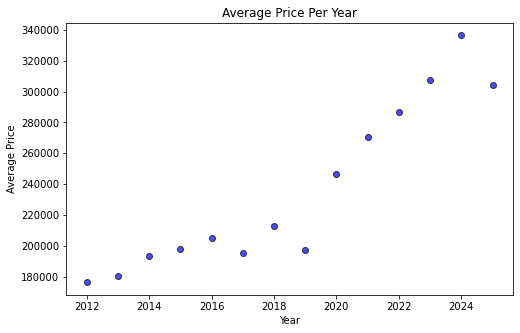

In [35]:
#Make scatterplot to see relationship of price and year

plt.figure(figsize=(8, 5))
plt.scatter(avg_price_per_year['Year'], avg_price_per_year['Avg_Price'], color='blue', edgecolors='black', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Per Year')

plt.show()

In [36]:
#We see a non-linear relationship. The goal is to adjust house prices based on the overall trend of the rising prices
#Refer to R code to see how I derived the relationship

avg_price_per_year.to_csv('C:/Users/MaxBo/OneDrive/Documents/Class MQE/Evidence Based Analysis/House Prices/avg_year_pittsburgh.csv', index=False)

In [37]:
#Export filtered sales data

sales.to_csv('C:/Users/MaxBo/OneDrive/Documents/Class MQE/Evidence Based Analysis/House Prices/Sales_Pittsburgh.csv', index=False)

## Orthogonal Polynomial Regression Output from R

### Regression 1: Regressing Average Price on Year

Call:<br>
lm(formula = Avg_Price ~ poly(Year, 2), data = avg_price)

Residuals:<br>
   Min     1Q Median     3Q    Max 
-25037  -8382   4499   9584  14593 

Coefficients:<br>
               Estimate     Std. Error    t value     Pr(>|t|)    <br>
(Intercept):    237266       3378       70.234       6.06e-16  <br>
poly(Year, 2)1:  152560      12640       12.069       1.10e-07  <br>
poly(Year, 2)2:   42791      12640        3.385       0.00608  <br>

Signif. codes:  0 *** 0.001 ** 0.01 * 0.05 . 0.1   

Residual standard error: 12640 on 11 degrees of freedom<br>
Multiple R-squared:  0.9346,<br>	Adjusted R-squared:  0.9227 <br>
F-statistic: 78.57 on 2 and 11 DF,<br>  p-value: 3.066e-07



## Orthogonal Polynomial Regression Output from R

### Regression 2: Regressing Individual Price on Year


Call:<br>
lm(formula = PRICE ~ poly(YEAR, 2), data = sales)

Residuals:<br>
     Min       1Q   Median       3Q      Max 
 -319681  -113049   -48749    52439 17050551 

Coefficients:
                Estimate Std. Error t value Pr(>|t|) <br>   
(Intercept)    2.474e+05  7.634e+02  324.05   <2e-16 <br>
poly(YEAR, 2)1 1.246e+07  2.218e+05   56.17   <2e-16 <br>
poly(YEAR, 2)2 3.523e+06  2.218e+05   15.88   <2e-16 <br>

Signif. codes:  0 *** 0.001 ** 0.01 * 0.05 . 0.1 ‘ ’ 1

Residual standard error: 221800 on 84422 degrees of freedom<br>
Multiple R-squared:  0.0388,<br>	Adjusted R-squared:  0.03878 <br>
F-statistic:  1704 on 2 and 84422 DF,<br>  p-value: < 2.2e-16

In [38]:
sales_standard = pd.read_csv('sales_standard_pittsburgh.csv')

In [39]:
#Find average standardized price per year

avg_year2 = sales_standard.groupby('YEAR')['STANDARDIZED'].mean()
avg_year2

YEAR
2012   -0.022779
2013   -0.009412
2014    0.029086
2015    0.027275
2016    0.029796
2017   -0.038253
2018   -0.015806
2019   -0.118389
2020    0.000669
2021    0.020105
2022    0.006403
2023   -0.000138
2024    0.015257
2025   -0.195532
Name: STANDARDIZED, dtype: float64

In [40]:
#Convert to dataframe

list_avg_year = avg_year2.tolist()
years = list(range(2012,2026))

avg_price_per_year = pd.DataFrame({'Year': years, 'Avg_Price': list_avg_year})
avg_price_per_year

,Year,Avg_Price
0,2012,-0.022779
1,2013,-0.009412
2,2014,0.029086
3,2015,0.027275
4,2016,0.029796
5,2017,-0.038253
6,2018,-0.015806
7,2019,-0.118389
8,2020,0.000669
9,2021,0.020105


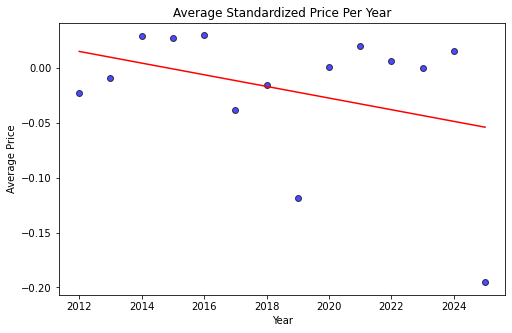

In [41]:
#plot
from scipy import stats
x = np.array(avg_price_per_year['Year'])
y = np.array(avg_price_per_year['Avg_Price'])

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.7)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
trendline = slope * x + intercept

plt.plot(x, trendline, color='red', label='Trendline')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Standardized Price Per Year')

plt.show()

In [42]:
#Slope, std error, and p-value

print(slope, std_err,p_value)

-0.005313922033463071 0.0041060935707857345 0.21996387371284157


In [43]:
avg_price_per_year2 = avg_price_per_year[avg_price_per_year['Year']!=2025]
avg_price_per_year2

,Year,Avg_Price
0,2012,-0.022779
1,2013,-0.009412
2,2014,0.029086
3,2015,0.027275
4,2016,0.029796
5,2017,-0.038253
6,2018,-0.015806
7,2019,-0.118389
8,2020,0.000669
9,2021,0.020105


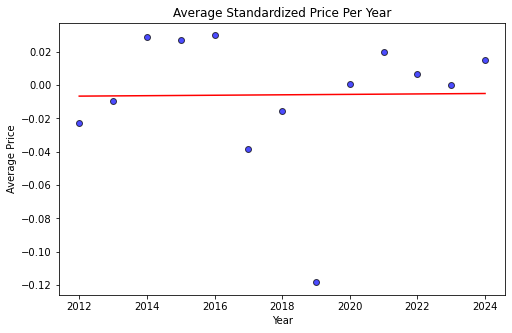

In [44]:
x = np.array(avg_price_per_year2['Year'])
y = np.array(avg_price_per_year2['Avg_Price'])

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', edgecolors='black', alpha=0.7)

slope2, intercept, r_value, p_value2, std_err2 = stats.linregress(x, y)
trendline = slope2 * x + intercept

plt.plot(x, trendline, color='red', label='Trendline')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Standardized Price Per Year')

plt.show()

In [45]:
#P-value indicates we cannot reject null at alpha=.1 that our coefficient is zero!
#Therefore we will continue without 2025 sales. Our detrending of rising house prices is complete.
print(slope2, std_err2,p_value2)

0.00013158034653087264 0.0030841616708025092 0.9667345510820953


In [46]:
#Filter out 2025

sales_standard = sales_standard[sales_standard['YEAR']!=2025]

In [47]:
#Now we will look at housing characteristics. We have a housing assessment dataset

assess.head()

,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,PROPERTYZIP,MUNICODE,MUNIDESC,SCHOOLCODE,SCHOOLDESC,LEGAL1,LEGAL2,LEGAL3,NEIGHCODE,NEIGHDESC,TAXCODE,TAXDESC,TAXSUBCODE,TAXSUBCODE_DESC,OWNERCODE,OWNERDESC,CLASS,CLASSDESC,USECODE,USEDESC,LOTAREA,HOMESTEADFLAG,FARMSTEADFLAG,CLEANGREEN,ABATEMENTFLAG,RECORDDATE,SALEDATE,SALEPRICE,SALECODE,SALEDESC,DEEDBOOK,DEEDPAGE,PREVSALEDATE,PREVSALEPRICE,PREVSALEDATE2,PREVSALEPRICE2,CHANGENOTICEADDRESS1,CHANGENOTICEADDRESS2,CHANGENOTICEADDRESS3,CHANGENOTICEADDRESS4,COUNTYBUILDING,COUNTYLAND,COUNTYTOTAL,COUNTYEXEMPTBLDG,LOCALBUILDING,LOCALLAND,LOCALTOTAL,FAIRMARKETBUILDING,FAIRMARKETLAND,FAIRMARKETTOTAL,STYLE,STYLEDESC,STORIES,YEARBLT,EXTERIORFINISH,EXTFINISH_DESC,ROOF,ROOFDESC,BASEMENT,BASEMENTDESC,GRADE,GRADEDESC,CONDITION,CONDITIONDESC,CDU,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLING,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE,FINISHEDLIVINGAREA,CARDNUMBER,ALT_ID,TAXYEAR,ASOFDATE
0,0001C00200000000,400.0,,LIBERTY AVE,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,47,Pittsburgh,GATEWAY PLAN OF LOTS NO 1 - REVISED,LOT NO 2 REVISED = 224.19 FRONTING WITH 8 TOTAL BEARINGS,NaN,51C01,PITTSBURGH URBAN,T,20 - Taxable,NaN,NaN,20,CORPORATION,C,COMMERCIAL,456,PARKING GARAGE/LOTS,54581,NaN,NaN,NaN,NaN,12-13-2004,12-13-2004,55000000.0,H,MULTI-PARCEL SA,12288,157.0,10-02-1995,51500000.0,NaN,NaN,21860 BURBANK BLVD STE 300-S,,WOODLAND HILLS CA,91367.0,5950000,1050000,7000000,0,5950000,1050000,7000000,5950000,1050000,7000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,01-MAR-25
1,0001C00200000001,501.0,,STANWIX ST,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,47,Pittsburgh,GATEWAY PLAN,PT LOT 1 = 29.42X44.83X44.56X29.34,(SUB PARCEL A IN DEED),51C01,PITTSBURGH URBAN,E,10 - Exempt,NaN,NaN,20,CORPORATION,G,GOVERNMENT,620,COUNTY GOVERNMENT,5768,NaN,NaN,NaN,NaN,NaN,01-24-1984,0.0,3,LOVE&AFFECTION,6495,289.0,NaN,NaN,NaN,NaN,345 6TH AVE,3RD FLOOR,PITTSBURGH PA,15222.0,286300,346100,632400,0,286300,346100,632400,286300,346100,632400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,01-MAR-25
2,0001C00228000000,400.0,-424,STANWIX ST,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,47,Pittsburgh,TOWN PLACE CONDOMINIUM,PARCEL A = 106.83X200.73X56.30X80X50X120.75,COMMON GROUND,51C01,PITTSBURGH URBAN,T,20 - Taxable,NaN,NaN,20,CORPORATION,C,COMMERCIAL,550,CONDOMINIUM UNIT,21388,NaN,NaN,NaN,NaN,07-13-2018,07-11-2018,0.0,3,LOVE&AFFECTION,17284,203.0,04-01-1927,0.0,NaN,NaN,11 PARKWAY CTR STE 300,,PITTSBURGH PA,15220.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,01-MAR-25
3,0001C00228000100,100.0,,FORBES AVE,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,47,Pittsburgh,TOWN PLACE CONDOMINIUM,UNIT 1,NaN,51C01,PITTSBURGH URBAN,T,20 - Taxable,NaN,NaN,20,CORPORATION,C,COMMERCIAL,550,CONDOMINIUM UNIT,0,NaN,NaN,NaN,NaN,03-01-2016,02-25-2016,0.0,H,MULTI-PARCEL SA,16304,109.0,NaN,NaN,NaN,NaN,11 PARKWAY CTR STE 300,,PITTSBURGH PA,15220.0,3400000,0,3400000,0,3400000,0,3400000,3400000,0,3400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,01-MAR-25
4,0001C00228000200,424.0,,STANWIX ST,PITTSBURGH,PA,,15222.0,101,1st Ward - PITTSBURGH,47,Pittsburgh,TOWN PLACE CONDOMINIUM,UNIT 2,NaN,51C01,PITTSBURGH URBAN,T,20 - Taxable,NaN,NaN,20,CORPORATION,C,COMMERCIAL,550,CONDOMINIUM UNIT,0,NaN,NaN,NaN,NaN,03-01-2016,02-25-2016,0.0,H,MULTI-PARCEL SA,16304,109.0,NaN,NaN,NaN,NaN,11 PARKWAY CTR STE 300,,PITTSBURGH PA,15220.0,4063500,0,4063500,0,4063500,0,4063500,4063500,0,4063500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,01-MAR-25


In [48]:
sales_standard2 = pd.merge(sales_standard, assess, on='PARID', how='inner')

In [49]:
sales_standard2 = sales_standard2[sales_standard2['CLASSDESC']=='RESIDENTIAL']

In [50]:
columns_list = sales_standard2.columns.tolist()
columns_list

['X_id',
 'PARID',
 'FULL_ADDRESS',
 'PROPERTYHOUSENUM_x',
 'PROPERTYFRACTION_x',
 'PROPERTYADDRESSDIR',
 'PROPERTYADDRESSSTREET',
 'PROPERTYADDRESSSUF',
 'PROPERTYADDRESSUNITDESC',
 'PROPERTYUNITNO',
 'PROPERTYCITY_x',
 'PROPERTYSTATE_x',
 'PROPERTYZIP_x',
 'SCHOOLCODE_x',
 'SCHOOLDESC_x',
 'MUNICODE_x',
 'MUNIDESC_x',
 'RECORDDATE_x',
 'SALEDATE_x',
 'PRICE',
 'DEEDBOOK_x',
 'DEEDPAGE_x',
 'SALECODE_x',
 'SALEDESC_x',
 'INSTRTYP',
 'INSTRTYPDESC',
 'YEAR',
 'PREDICTED',
 'DETRENDED',
 'STANDARDIZED',
 'PROPERTYHOUSENUM_y',
 'PROPERTYFRACTION_y',
 'PROPERTYADDRESS',
 'PROPERTYCITY_y',
 'PROPERTYSTATE_y',
 'PROPERTYUNIT',
 'PROPERTYZIP_y',
 'MUNICODE_y',
 'MUNIDESC_y',
 'SCHOOLCODE_y',
 'SCHOOLDESC_y',
 'LEGAL1',
 'LEGAL2',
 'LEGAL3',
 'NEIGHCODE',
 'NEIGHDESC',
 'TAXCODE',
 'TAXDESC',
 'TAXSUBCODE',
 'TAXSUBCODE_DESC',
 'OWNERCODE',
 'OWNERDESC',
 'CLASS',
 'CLASSDESC',
 'USECODE',
 'USEDESC',
 'LOTAREA',
 'HOMESTEADFLAG',
 'FARMSTEADFLAG',
 'CLEANGREEN',
 'ABATEMENTFLAG',
 'RECORDDAT

In [51]:
housing_characteristics = ['LOTAREA','STORIES','YEARBLT','EXTERIORFINISH','BASEMENT','CONDITION','TOTALROOMS']

In [52]:
#How much housing characteristic data are we missing for each characteristic?

sales_na = sales_standard2[housing_characteristics].isna().sum()
n_sales_total = len(sales_standard2)

percent_sales_missing = (sales_na/n_sales_total)*100

percent_sales_missing

LOTAREA           0.000000
STORIES           0.360144
YEARBLT           0.360144
EXTERIORFINISH    0.360144
BASEMENT          0.388391
CONDITION         0.367206
TOTALROOMS        0.395452
dtype: float64

In [53]:
#Only slightly below 2% is missing, we can drop these.

sales_standard2 = sales_standard2.dropna(subset=housing_characteristics)

In [54]:
#Check we have no more nulls!

sales_na = sales_standard2[housing_characteristics].isna().sum()
n_sales_total = len(sales_standard2)

percent_sales_missing = (sales_na/n_sales_total)*100

percent_sales_missing

LOTAREA           0.0
STORIES           0.0
YEARBLT           0.0
EXTERIORFINISH    0.0
BASEMENT          0.0
CONDITION         0.0
TOTALROOMS        0.0
dtype: float64

In [55]:
#Compile a final clean dataset with all relevant variables. Then we will go to R and run a housing characteristic regression.

final_data = ['MUNIDESC_x','PRICE','STANDARDIZED','PARID','LOTAREA','STORIES','YEARBLT','EXTERIORFINISH','BASEMENT','CONDITION','TOTALROOMS']

sales_standard3 = sales_standard2[final_data]

In [56]:
#Check types of each column

pd.set_option('display.max_rows', 11)
sales_standard3.dtypes.to_frame()

,0
MUNIDESC_x,object
PRICE,float64
STANDARDIZED,float64
PARID,object
LOTAREA,int64
STORIES,float64
YEARBLT,float64
EXTERIORFINISH,float64
BASEMENT,float64
CONDITION,float64


In [57]:
sales_standard3.head()

,MUNIDESC_x,PRICE,STANDARDIZED,PARID,LOTAREA,STORIES,YEARBLT,EXTERIORFINISH,BASEMENT,CONDITION,TOTALROOMS
0,4th Ward - PITTSBURGH,157000.0,-0.091777,0028S00066000000,2574,2.0,1920.0,2.0,5.0,3.0,6.0
1,15th Ward - PITTSBURGH,320000.0,0.196344,0054L00184000000,9368,2.0,1917.0,2.0,5.0,3.0,7.0
4,19th Ward - PITTSBURGH,75000.0,-0.382176,0062M00042000000,9000,2.0,1935.0,6.0,5.0,3.0,6.0
5,16th Ward - PITTSBURGH,46000.0,-0.485118,0013J00196000000,5200,1.0,1953.0,2.0,5.0,4.0,5.0
6,4th Ward - PITTSBURGH,95000.0,-0.311181,0052E00033005400,0,1.0,1972.0,2.0,1.0,3.0,4.0


The rest of the project will be completed in R. We will run the housing characteristic regression.
This regression will give us an estimate of how much each characteristic contributes to price differences. 
The remaining residuals after this regression would represent price deviations unexplained by home attributes,
isolating the neighborhood effect. Then we will order average the neighborhood effect across all observations in their respective neighorhood. Then, we will sort these averages by most expensive to least expensive.

In [58]:
sales_standard3.to_csv('C:/Users/MaxBo/OneDrive/Documents/Class MQE/Evidence Based Analysis/House Prices/sales_standard3_pittsburgh.csv', index=False)